In [1]:
from Data_Generator import DataLoader
import numpy as np
import tensorflow as tf
from keras import backend as K
import pickle 
from keras_i3d import I3D
import imageio
from tensorflow_docs.vis import embed

2023-05-28 17:04:15.851409: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-28 17:04:15.884917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 17:04:16.456902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-28 17:04:18.331814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute c

We have presaved test train video paths!
We have saved dictionaries to map labels to ohes


/home/nigar.alishzada/SLR/SLR/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
2023-05-28 17:04:18.781446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


this is video path /home/nigar.alishzada/SLR/keras-kinetics-i3d/WL_AzSL/videos_by_names/S/afe7f0a5bd394adea79f540c203c78e4.mp4
here i am returning piu piu
this is video path /home/nigar.alishzada/SLR/keras-kinetics-i3d/WL_AzSL/videos_by_names/EDƏ BİLMƏK/210b2d02e24244678ddbc5772be157e3.mp4
frame is here
calculated tvl1
frame is here
calculated tvl1
here i am returning piu piu
this is video path /home/nigar.alishzada/SLR/keras-kinetics-i3d/WL_AzSL/videos_by_names/14/d84ba90fa1d74e9681534e17f9fac95c.mp4
frame is here
calculated tvl1
here i am returning piu piu
this is video path /home/nigar.alishzada/SLR/keras-kinetics-i3d/WL_AzSL/videos_by_names/MƏN/fee35a88f7014fbbb7ee1b6013d7c06b.mp4
here i am returning piu piu
this is video path /home/nigar.alishzada/SLR/keras-kinetics-i3d/WL_AzSL/videos_by_names/HANSI/cb2ffc9ac1994eeaba22a1b3ac97eb6d.mp4
frame is here
calculated tvl1
here i am returning piu piu
(5, 20, 224, 224, 2)
(5, 241)
this is video path /home/nigar.alishzada/SLR/keras-kinetics

In [2]:
model = I3D().model(classes = 261)
model.load_weights(r'/home/nigar.alishzada/SLR/keras-kinetics-i3d/weights_all/weights-39-0.48.h5')

In [2]:
# Load data
data = DataLoader('WL_AzSL/videos_by_names')
train_set,test_set = data.stream_line(n_frames = 20,output_size=(224,224),frame_step = 1)


def to_gif(images):
    converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
    imageio.mimsave('./animation.gif', converted_images, fps=20)
    return embed.embed_file('./animation.gif')

index_to_label = pickle.load(open('/home/nigar.alishzada/SLR/keras-kinetics-i3d/datastream_cache/index_to_label.pkl','rb'))

2023-05-17 16:11:11.341530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 16:11:12.436185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 154 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-05-17 16:11:12.436840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9258 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5
2023-05-17 16:11:12.440742: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 154.69M 

We have presaved test train video paths!
We have saved dictionaries to map labels to ohes


In [3]:
for x, label in test_set.take(10):
    vid = x
    l = label
    print(index_to_label[np.argmax(l)])

# vid = tf.reshape(vid, (20, 224, 224, 3))
# vid.shape


# to_gif(vid)

ALMAQ
ALMAQ
ALMAQ
ALMAQ
ALMAQ
ALMAQ
MƏN
MƏN
MƏN
MƏN


In [5]:
video_path = r'/home/nigar.alishzada/SLR/keras-kinetics-i3d/2022-06-01 15-17-31.mp4'

video = DataLoader.frames_from_video_file(video_path, 150, frame_step = 1)

clip_size = 20
stride = 10
num_clips = ((150 - clip_size) // stride) + 1
clips = np.zeros((num_clips, clip_size, 224, 224, 3))
for i in range(num_clips):
    clips[i] = video[i*stride:i*stride+clip_size]

In [7]:
vid.shape

TensorShape([1, 20, 224, 224, 3])


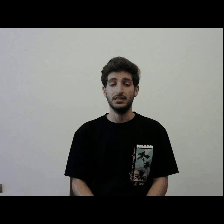

In [4]:
to_gif(vid[0])

In [26]:
for clip in clips:
    vid = clip.reshape((1,20,224,224,3)) 
    pred = model.predict(vid)
    max_index = np.argmax(pred)
    label = index_to_label[max_index]
    print(label)

1/1 [==============================] - 0s 34ms/step
ALMAQ
1/1 [==============================] - 0s 24ms/step
NƏDİR
1/1 [==============================] - 0s 34ms/step
BAZAR
1/1 [==============================] - 0s 32ms/step
İŞLƏMƏK
1/1 [==============================] - 0s 35ms/step
ETMƏK
1/1 [==============================] - 0s 24ms/step
DƏRS
1/1 [==============================] - 0s 32ms/step
DƏRS
1/1 [==============================] - 0s 49ms/step
İSTƏMƏK
1/1 [==============================] - 0s 31ms/step
İSTƏMƏK
1/1 [==============================] - 0s 31ms/step
İSTƏMƏK
1/1 [==============================] - 0s 33ms/step
İSTƏMƏK
1/1 [==============================] - 0s 32ms/step
BU
1/1 [==============================] - 0s 32ms/step
BU
1/1 [==============================] - 0s 27ms/step
BU
